In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [2]:
datafile = "weather_data.csv"

In [3]:
def get_data(filename):
    df = pd.read_csv(filename)
    X_ = df[["Humidity","Visibility (km)"]]
    Y_ = df[["Temperature (C)"]]
    
    # Spliting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.25, random_state=42)

   
    
    return X_train, X_test, y_train, y_test



In [4]:
X_train, X_test, y_train, y_test = get_data(datafile)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(72321, 2) (24108, 2) (72321, 1) (24108, 1)


In [5]:
def data_iter(batch_size, X, y):
    num_examples = len(X)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        #write your code here to retrun batch wise X,y
        yield X[i:min(i + batch_size, num_examples)], y[i:min(i + batch_size, num_examples)] 
    return

In [6]:
#define your batch size
batch_size = 24108

for X, y in data_iter(batch_size, X_test, y_test):
    print(X, '\n', y)
    break

       Humidity  Visibility (km)
25072      0.82            0.643
76967      0.96            0.040
22153      0.90            0.983
38552      0.85            0.056
82925      0.49            0.966
...         ...              ...
20586      0.85            0.227
29321      0.92            0.160
44059      0.41            0.620
67937      0.53            0.620
21572      0.78            0.711

[24108 rows x 2 columns] 
        Temperature (C)
25072         0.563251
76967         0.407837
22153         0.677077
38552         0.276862
82925         0.822798
...                ...
20586         0.409577
29321         0.322177
44059         0.652473
67937         0.744346
21572         0.654213

[24108 rows x 1 columns]


## create and initialize model parameter

In [7]:

def create_model_parameter(mu, sigma, row, column):
    w = np.random.normal(mu, sigma, size=(row, column))
    w = np.transpose(w)
    w.reshape((2,1))
    b = np.zeros(1, dtype=float)
    return w,b

In [8]:
def model(X, w, b):  
    """The linear regression model."""
    # write your code here
    return np.dot(X, w) + b[0]

In [9]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    #write your code here for loss function
    return np.mean(np.square(y_hat - y), axis=0)

In [10]:
def gradient(X, y, y_hat, loss):
    #compute gradeint of loss function with respect to params
    grads = np.array([[(2/len(X))*np.dot((y_hat - y).T, X ).T], [(2/len(X))*np.sum(y_hat - y)]], dtype=object)
    return grads
    

In [11]:
def sgd(w, b, grads, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    #write your code for updating your parameter using gradient descent algorithm
    #Example: theta = theta - (lr * grad)/batch_size
    w[0][0] = w[0][0] - (lr * grads[0][0][0])/batch_size
    w[1][0] = w[1][0] - (lr * grads[0][0][1])/batch_size
    b = b - (lr * np.array([grads[1][0]]))/batch_size
    return w , b
    

In [12]:
def train(lr,num_epochs,X,y, w ,b):
    # write your own code and modify the below code as needed
    loss = np.zeros(num_epochs)
    for epoch in range(num_epochs):
        i=1
        batches = data_iter(batch_size, X, y)
        for X_batch, y_batch in batches:
           y_hat = model(X_batch, w, b)
           loss[epoch] = squared_loss(y_hat, y_batch)
           grads = gradient(X_batch, y_batch, y_hat, loss)
           w, b = sgd(w, b, grads, lr, batch_size)
           #print('batch:' , i , " samlpes:", i*batch_size, " loss:", loss[epoch])
           i += 1
           print("Batch: "+str(i)+" Epoch: "+str(epoch+1)+" loss: "+str(loss[epoch]), end='\r')
        if (((epoch+1) % 10000) == 0):
            print("Epoch: [", epoch+1, "/", num_epochs,"]" ' Loss: ', loss[epoch])
           
        # train_l = squared_loss(net(features, w, b), labels)
        # print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')
    
    return epoch, loss, w, b

In [25]:
def draw_loss(num_epochs,loss_s, loss_e, loss_l):
    plt.plot(num_epochs, loss_s, label = "Small Batch 2048") 
    plt.plot(num_epochs, loss_e, label = "'Exact' Batch 8192") 
    plt.plot(num_epochs, loss_l, label = "Large Batch 24108") 
    plt.legend()
    plt.ylim(0,0.7)
    plt.title("Number of Epochs VS Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Loss")
    plt.show()

In [14]:
def test(X, y, w, b):
    # write your own code 
    #predict temperature for the given humidity and visibility
    y_hat = model(X, w, b)
    loss = squared_loss(y_hat, y)
    return loss

In [24]:
LEARNING_RATE = 0.07
EPOCHS = 60000
batch_size = 2048
w_small, b_small = create_model_parameter(np.mean(X_train, axis=0), np.std(X_train), 1, 2)
epoch_small, loss_small, w_small, b_small = train(LEARNING_RATE, EPOCHS, X_train, y_train, w_small, b_small)
batch_size = 8192
w_exact, b_exact = create_model_parameter(np.mean(X_train, axis=0), np.std(X_train), 1, 2)
epoch_exact, loss_exact, w_exact, b_exact = train(LEARNING_RATE, EPOCHS, X_train, y_train, w_exact, b_exact)
batch_size = 24108
w_large, b_large = create_model_parameter(np.mean(X_train, axis=0), np.std(X_train), 1, 2)
epoch_large, loss_large, w_large, b_large = train(LEARNING_RATE, EPOCHS, X_train, y_train, w_large, b_large)

Epoch: [ 10000 / 60000 ] Loss:  0.035676750432662586
Epoch: [ 20000 / 60000 ] Loss:  0.025495338351697233
Epoch: [ 30000 / 60000 ] Loss:  0.020650797747302965
Epoch: [ 40000 / 60000 ] Loss:  0.018342227250553584
Epoch: [ 50000 / 60000 ] Loss:  0.017239364474395915
Epoch: [ 60000 / 60000 ] Loss:  0.01671050218134967
Epoch: [ 10000 / 60000 ] Loss:  0.041950992054031744
Epoch: [ 20000 / 60000 ] Loss:  0.04053220474039799
Epoch: [ 30000 / 60000 ] Loss:  0.039319867431152386
Epoch: [ 40000 / 60000 ] Loss:  0.03817683546752418
Epoch: [ 50000 / 60000 ] Loss:  0.03709665627890796
Epoch: [ 60000 / 60000 ] Loss:  0.03607423144296116
Epoch: [ 10000 / 60000 ] Loss:  0.15124138445090837
Epoch: [ 20000 / 60000 ] Loss:  0.10505072419755478
Epoch: [ 30000 / 60000 ] Loss:  0.08167765698382287
Epoch: [ 40000 / 60000 ] Loss:  0.06977520397010384
Epoch: [ 50000 / 60000 ] Loss:  0.06363678542413033
Epoch: [ 60000 / 60000 ] Loss:  0.06039351571838486


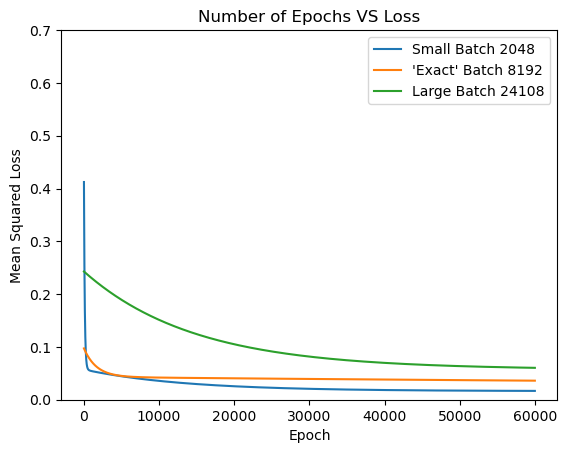

In [26]:
draw_loss(np.array(range(EPOCHS))+1, loss_small, loss_exact, loss_large)

In [28]:
pred = test(X_test, y_test, w_small, b_small)
print("Loss with test data: ", np.array(pred)[0], "\nNumber of sameples: ", len(y_test))

Loss with test data:  0.01597170326910379 
Number of sameples:  24108


In [27]:
pred = test(X_test, y_test, w_exact, b_exact)
print("Loss with test data: ", np.array(pred)[0], "\nNumber of sameples: ", len(y_test))

Loss with test data:  0.0369260164559858 
Number of sameples:  24108


In [29]:
pred = test(X_test, y_test, w_large, b_large)
print("Loss with test data: ", np.array(pred)[0], "\nNumber of sameples: ", len(y_test))

Loss with test data:  0.05989538040555713 
Number of sameples:  24108


Note the optimum batch size lies betweem small and exact. 

# Logistic Regression
### Will it be hotter than 65C?

Sigmoid function is f(z) = 1/(1+e^(-z))

In [30]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

w is a column vector of weights for each input, b is the bias value

In [111]:
# (np.mean(X_train, axis=0), np.std(X_train), 1, 2)
# def create_model_parameter(mu, sigma, row, column):
#     w = np.random.normal(mu, sigma, size=(row, column))
#     w = np.transpose(w)
#     w.reshape((2,1))
def initialize_params(mu, sigma, dim):
    w = np.random.normal(mu, sigma, size=(1,dim))
    w = np.transpose(w)
    w.reshape((2,1))
    b = 0
    return w, b

Convert y data to binary yes no

In [73]:
def y_as_binary(y):
    result = np.ones((len(y),1))
    for y_value in y.iloc[:,0]:
        i = 0
        if y_value > 0.65:
            result[i] = 1
        else:
            result[i] = -1
    return result

In [81]:
def propogate(w, b, X, Y):
    samples = len(X)
    A = sigmoid(np.dot(X,w)+b)
    cost = -(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))/samples

    dZ = A-Y
    dw = (np.dot(dZ.T, X))/samples
    db = (np.sum(dZ))/samples

    grads = {"dw": dw,
             "db": db}
    return grads, cost


In [120]:
def optimize(w, b, X, y, num_epochs, lr):
    costs = []

    for i in range (num_epochs):
        grads, cost = propogate(w, b, X, y)
        dw = grads["dw"]
        db = grads["db"]

        w = w - lr*dw
        b = b - lr*db

        if (i+1) % 100 == 0:
            print("Epoch ["+str(i+1)+" / " +str(num_epochs)+"] Cost: "+str(cost))
        costs.append(cost)
        print("Cost: "+ str(cost), end='\r')

    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": b}
    return params, grads, costs

In [98]:
def predict(w, b, X):
    samples = len(X)
    Y_prediction = np.zeros((samples, 1))
    A = sigmoid(np.dot(X, w)+b)
    for i in range(samples):
        if A[i,0]>0.5:
            Y_prediction[i,0] = 1
        else:
            Y_prediction[i,0] = -1
    
    return Y_prediction

Epoch [100 / 2000] Cost: 0.8667066934804778
Epoch [200 / 2000] Cost: 0.7991083753338415
Epoch [300 / 2000] Cost: 0.739744744543271
Epoch [400 / 2000] Cost: 0.6873811266370717
Epoch [500 / 2000] Cost: 0.6409867567775882
Epoch [600 / 2000] Cost: 0.5997011628249326
Epoch [700 / 2000] Cost: 0.5628051291721055
Epoch [800 / 2000] Cost: 0.5296961812289005
Epoch [900 / 2000] Cost: 0.4998681847484831
Epoch [1000 / 2000] Cost: 0.4728945224772821
Epoch [1100 / 2000] Cost: 0.4484142946562712
Epoch [1200 / 2000] Cost: 0.4261210306091742
Epoch [1300 / 2000] Cost: 0.4057534623734119
Epoch [1400 / 2000] Cost: 0.3870879800410225
Epoch [1500 / 2000] Cost: 0.3699324533107119
Epoch [1600 / 2000] Cost: 0.3541211609677475
Epoch [1700 / 2000] Cost: 0.33951061859209297
Epoch [1800 / 2000] Cost: 0.3259761350812416
Epoch [1900 / 2000] Cost: 0.3134089614798596
Epoch [2000 / 2000] Cost: 0.301713922229136
Accuracy on train set: 0.9999723455151339
Accuracy on test set: 1.0


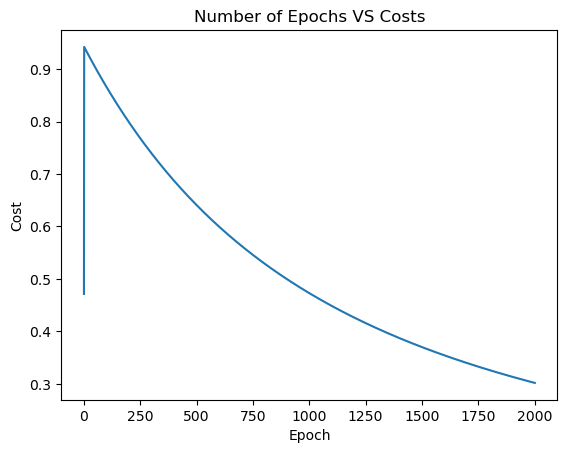

In [121]:
w_log, b_log = initialize_params(np.mean(X_train, axis=0), np.std(X_train), 2)
log_epochs = 2000
log_learning_rate = 0.001
Y_train = y_as_binary(y_train)
Y_test = y_as_binary(y_test)
params, grads, costs = optimize(w_log, b_log, X_train, Y_train, log_epochs, log_learning_rate)
w_log = params['w']
b_log = params['b']

prediction_train = predict(w_log, b_log, X_train)
prediction_test = predict(w_log, b_log, X_test)

accuracy_train = 1 - np.mean(np.abs(prediction_train - Y_train))
accuracy_test = 1- np.mean(np.abs(prediction_test - Y_test))
print("Accuracy on train set: "+str(accuracy_train))
print("Accuracy on test set: "+str(accuracy_test))
plt.plot(np.array(range(log_epochs))+1, costs) 
#plt.ylim(0,0.7)
plt.title("Number of Epochs VS Costs")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()
